In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3" 
import torchvision
from torchvision import transforms
import torchvision.transforms.functional as TF 
from pytorchtools import EarlyStopping
from os.path import splitext
from os import listdir
import torch.utils.data
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# in order to get reproducable results
seed = 1
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed(seed)
def _init_fn(worker_id):
    np.random.seed(int(seed))

In [17]:
from models.UNET import Unet
model = Unet()
print("use model Unet")

use model Unet


In [18]:
dncnnmodelName = "0406_thebe_synthetic_96_96_96"
iterationNo = "8000"

base_dir = './thebe100testset96_10per'
seis_path = '{}/thebeori'.format(base_dir)
fault_path = '{}/annotation'.format(base_dir)
seis_path_denoised = '{}/our{}_{}'.format(base_dir,dncnnmodelName,iterationNo)

print(seis_path)
print(seis_path_denoised)

./thebe100testset96_10per/thebeori
./thebe100testset96_10per/our0406_thebe_synthetic_96_96_96_8000


In [19]:
prediction_path_thebe_denoised = '{}/predictions96/our{}_{}'.format(base_dir,dncnnmodelName,iterationNo)
prediction_path_thebe = '{}/predictions96/thebeori'.format(base_dir)

if not os.path.exists(prediction_path_thebe_denoised):
    os.makedirs(prediction_path_thebe_denoised)

if not os.path.exists(prediction_path_thebe):
    os.makedirs(prediction_path_thebe)
    
print(prediction_path_thebe_denoised)
print(prediction_path_thebe)

./thebe100testset96_10per/predictions96/our0406_thebe_synthetic_96_96_96_8000
./thebe100testset96_10per/predictions96/thebeori


# Predict ori thebe patch

In [5]:
model.load_state_dict(torch.load("unetthebe10per_lrp3_p10_lr0.01_b64.model", map_location="cuda:0")) 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Send the model to GPU
model = model.to(device)
model.eval()
seed = 1
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed(seed)
def _init_fn(worker_id):
    np.random.seed(int(seed))
for i in range(100):
    img_ori = np.load("{}/{}.npy".format(seis_path,i))
#     print(img_ori.shape, img_ori.min(), img_ori.max())
    img = TF.to_tensor(img_ori)
#     print(img.shape, img.min(), img.max())
    img = (img-img.min())/(img.max()-img.min())
#     print(img.shape, img.min(), img.max())
    img = img.unsqueeze(0)
#     print(img.shape, img.min(), img.max())
    pred = model(img.float().to(device=device)).detach().cpu().numpy()
#     break
    np.save('{}/{}.npy'.format(prediction_path_thebe,i), pred.squeeze())

# Predict

In [7]:
model.load_state_dict(torch.load("unetthebe10per_0406_thebe_synthetic_96_96_96_8000_lrp3_p10_lr0.01_b64.model", map_location="cuda:0")) 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Send the model to GPU
model = model.to(device)
model.eval()
seed = 1
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed(seed)
def _init_fn(worker_id):
    np.random.seed(int(seed))
for i in range(100):
    img_denoise_ori = np.load('{}/{}.npy'.format(seis_path_denoised,i))
#     print(img_denoise_ori.shape, img_denoise_ori.min(), img_denoise_ori.max())
    img_denoise = TF.to_tensor(img_denoise_ori)
#     print(img_denoise.shape, img_denoise.min(), img_denoise.max())
    img_denoise = (img_denoise-img_denoise.min())/(img_denoise.max()-img_denoise.min())
#     print(img_denoise.shape, img_denoise.min(), img_denoise.max())
    img_denoise = img_denoise.unsqueeze(0)
#     print(img_denoise.shape, img_denoise.min(), img_denoise.max())
    pred_denoised = model(img_denoise.float().to(device=device)).detach().cpu().numpy()
    
#     break
    np.save('{}/{}.npy'.format(prediction_path_thebe_denoised,i), pred_denoised.squeeze())   

# figures

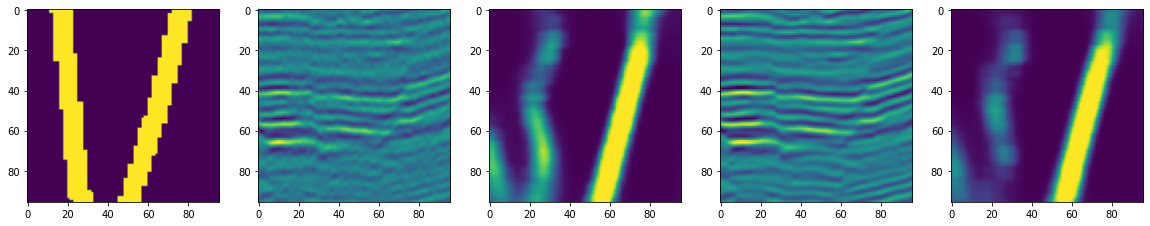

In [8]:
i = 0
fault = np.load("{}/{}.npy".format(fault_path,i))
img_ori = np.load("{}/{}.npy".format(seis_path,i))
pred_ori = np.load("{}/{}.npy".format(prediction_path_thebe,i))
img_denoise_our = np.load('{}/{}.npy'.format(seis_path_denoised,i))
pred_our = np.load("{}/{}.npy".format(prediction_path_thebe_denoised,i))

plt.figure(figsize=(20, 40))
plt.subplot(151)
plt.imshow(fault)
plt.subplot(152)
plt.imshow(img_ori)
plt.subplot(153)
plt.imshow(pred_ori)
plt.subplot(154)
plt.imshow(img_denoise_our)
plt.subplot(155)
plt.imshow(pred_our)

[68, 36, 56]


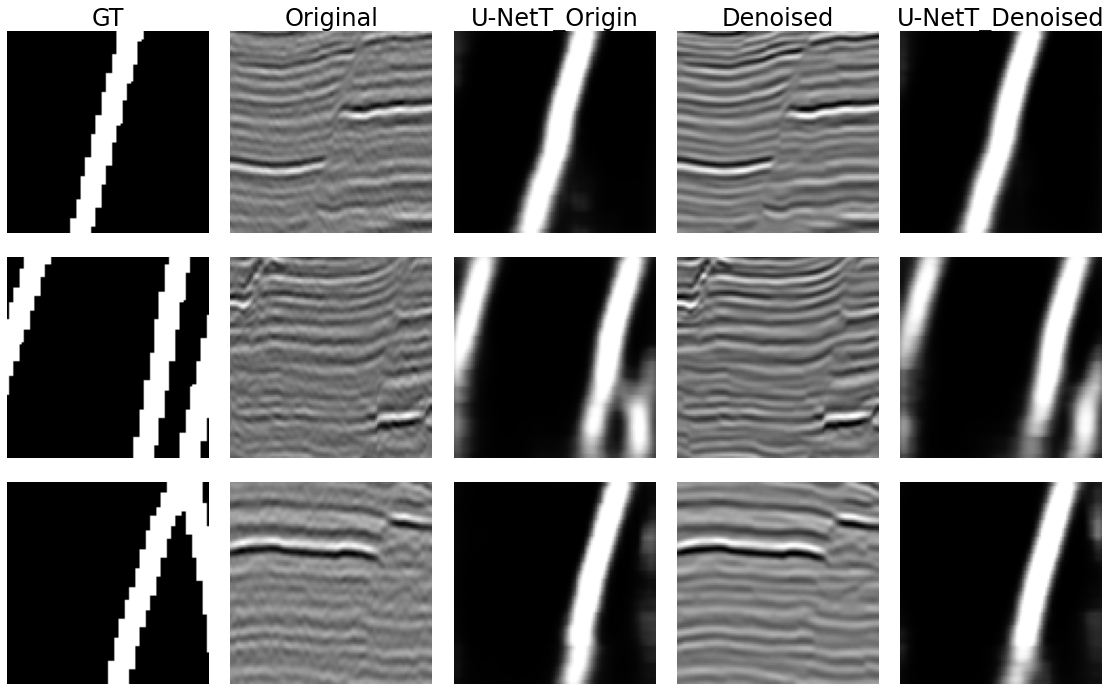

In [20]:
seed = 2022
random.seed(seed)

cols= 3
# sampleNo = [2, 98, 37, 72] 
# sampleNo = [30, 98, 43, 16]
sampleNo = random.sample(range(0, 100), cols)
print(sampleNo)
rows = 5

f, axarr = plt.subplots(cols, rows, figsize = (20,12))
[axi.set_axis_off() for axi in axarr.ravel()]
plt.subplots_adjust(wspace =0, hspace =0.12)
plt.rcParams.update({'font.size': 20})

axarr[0, 0].set_title('GT')
axarr[0, 1].set_title('Original')
axarr[0, 2].set_title('U-NetT_Origin')
# axarr[0, 3].set_title('Ours')
axarr[0, 3].set_title('Denoised')
axarr[0, 4].set_title('U-NetT_Denoised')
    
for ith in range(cols):
    i = sampleNo[ith]
    fault = np.load("{}/{}.npy".format(fault_path,i))
    img_ori = np.load("{}/{}.npy".format(seis_path,i))
    pred_ori = np.load("{}/{}.npy".format(prediction_path_thebe,i))
    img_denoise_our = np.load('{}/{}.npy'.format(seis_path_denoised,i))
    pred_our = np.load("{}/{}.npy".format(prediction_path_thebe_denoised,i))
    
    axarr[ith, 0].imshow(fault, cmap='gray')
    axarr[ith, 1].imshow(img_ori, cmap='gray')
    axarr[ith, 2].imshow(pred_ori, cmap='gray')
    axarr[ith, 3].imshow(img_denoise_our, cmap='gray')
    axarr[ith, 4].imshow(pred_our, cmap='gray')

plt.savefig("fault_denoising{}.pdf".format(seed), bbox_inches='tight')

# Evaluation

In [10]:
from sklearn.metrics import average_precision_score
import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [11]:
print(prediction_path_thebe_denoised)
print(prediction_path_thebe)

./thebe100testset96_10per/predictions96/our0406_thebe_synthetic_96_96_96_8000
./thebe100testset96_10per/predictions96/thebeori


In [12]:
i = 0
fault = np.load("{}/{}.npy".format(fault_path,i))
fault = TF.to_tensor(fault)
print(fault.shape, fault.dtype)
pred = np.load("{}/{}.npy".format(prediction_path_thebe,i))
print(pred.shape, pred.dtype)
# pred_denoised = np.load("{}/{}.npy".format(prediction_path_thebe_denoised,i))
ap1 = average_precision_score(fault.flatten(), pred.flatten())
# ap2 = average_precision_score(fault.flatten(), pred_denoised.flatten())
print(ap1)

torch.Size([1, 96, 96]) torch.float64
(96, 96) float32
0.6297999471171379


In [14]:
import math
count = 0
print(prediction_path_thebe_denoised)
print(prediction_path_thebe)
print("itemNo\tori\tOur_{}_{}".format(dncnnmodelName,iterationNo))
for i in range(100):
    fault = np.load("{}/{}.npy".format(fault_path,i))
    fault = TF.to_tensor(fault)
    pred = np.load("{}/{}.npy".format(prediction_path_thebe,i))
    pred_denoised = np.load("{}/{}.npy".format(prediction_path_thebe_denoised,i))
    ap1 = average_precision_score(fault.flatten(), pred.flatten())
    ap2 = average_precision_score(fault.flatten(), pred_denoised.flatten())
    if math.isnan(ap1) or  math.isnan(ap2):
        count += 1
    else:
        print(i, "\t", ap1, "\t", ap2)
#     break
print(count)


./thebe100testset96_10per/predictions96/our0406_thebe_synthetic_96_96_96_8000
./thebe100testset96_10per/predictions96/thebeori
itemNo	ori	Our_0406_thebe_synthetic_96_96_96_8000
0 	 0.6297999471171379 	 0.5830363013191844
1 	 0.3630057048912406 	 0.36079720860735426
2 	 0.9820850200477416 	 0.9805706188875029
3 	 0.8843714387050408 	 0.9108625867709204
4 	 0.9066773851038519 	 0.9005151994517734
5 	 0.9289524799308073 	 0.9221130134860992
6 	 0.4058911593285515 	 0.4518464533929569
7 	 0.42891082000588243 	 0.336252211878793
8 	 0.6568014611487912 	 0.6538027078928825
9 	 0.8522144816772368 	 0.8314238183442464
10 	 0.4382812254283821 	 0.4624069660570699
11 	 0.38291278781899224 	 0.4009798527709651
12 	 0.9533226252561262 	 0.9472335738432643
13 	 0.9460252987548781 	 0.9470177833134047
14 	 0.8567663378811893 	 0.9230227950807663
15 	 0.6412688901944683 	 0.6715706528213161
16 	 0.8191168710591388 	 0.871824594669708
17 	 0.37020125174988466 	 0.33277033045669385
18 	 0.0956519676924

# Experiment 2 Transfer ability 
faultsegUnet on thebe data

In [6]:
dncnnmodelName = "0406_thebe_faultseg_96_96_96"
iterationNo = "8000"

base_dir = './thebe100testset96_10per'
seis_path = '{}/thebeori'.format(base_dir)
fault_path = '{}/annotation'.format(base_dir)
seis_path_denoised = '{}/our{}_{}'.format(base_dir,dncnnmodelName,iterationNo)

print(seis_path)
print(seis_path_denoised)

prediction_path_thebe_denoised = '{}/predictions96/faultsegunet_our{}_{}'.format(base_dir,dncnnmodelName,iterationNo)
prediction_path_thebe = '{}/predictions96/faultsegunet_thebeori'.format(base_dir)

if not os.path.exists(prediction_path_thebe_denoised):
    os.makedirs(prediction_path_thebe_denoised)

if not os.path.exists(prediction_path_thebe):
    os.makedirs(prediction_path_thebe)
    
print(prediction_path_thebe_denoised)
print(prediction_path_thebe)

./thebe100testset96_10per/thebeori
./thebe100testset96_10per/our0406_thebe_faultseg_96_96_96_8000
./thebe100testset96_10per/predictions96/faultsegunet_our0406_thebe_faultseg_96_96_96_8000
./thebe100testset96_10per/predictions96/faultsegunet_thebeori


In [27]:
model.load_state_dict(torch.load("unetfaultSeg_lrp3_p10_lr0.01_b64.model", map_location="cuda:0")) 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Send the model to GPU
model = model.to(device)
model.eval()
seed = 1
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed(seed)
def _init_fn(worker_id):
    np.random.seed(int(seed))
for i in range(100):
    img_ori = np.load("{}/{}.npy".format(seis_path,i))
#     print(img_ori.shape, img_ori.min(), img_ori.max())
    img = TF.to_tensor(img_ori)
#     print(img.shape, img.min(), img.max())
    img = (img-img.min())/(img.max()-img.min())
#     print(img.shape, img.min(), img.max())
#     img = TF.normalize(img, [0.4915,], [0.0655,])
    img = img.unsqueeze(0)
#     print(img.shape, img.min(), img.max())
    pred = model(img.float().to(device=device)).detach().cpu().numpy()
#     break
    np.save('{}/{}.npy'.format(prediction_path_thebe,i), pred.squeeze())

In [28]:
model.load_state_dict(torch.load("unetfaultSeg_lrp3_p10_lr0.01_b64.model", map_location="cuda:0")) 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Send the model to GPU
model = model.to(device)
model.eval()
seed = 1
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed(seed)
def _init_fn(worker_id):
    np.random.seed(int(seed))
for i in range(100):
    img_denoise_ori = np.load('{}/{}.npy'.format(seis_path_denoised,i))
#     print(img_denoise_ori.shape, img_denoise_ori.min(), img_denoise_ori.max())
    img_denoise = TF.to_tensor(img_denoise_ori)
#     print(img_denoise.shape, img_denoise.min(), img_denoise.max())
    img_denoise = (img_denoise-img_denoise.min())/(img_denoise.max()-img_denoise.min())
#     print(img_denoise.shape, img_denoise.min(), img_denoise.max())
#     img_denoise = TF.normalize(img_denoise, [0.4915,], [0.0655,])
    img_denoise = img_denoise.unsqueeze(0)
#     print(img_denoise.shape, img_denoise.min(), img_denoise.max())
    pred_denoised = model(img_denoise.float().to(device=device)).detach().cpu().numpy()
    
#     break
    np.save('{}/{}.npy'.format(prediction_path_thebe_denoised,i), pred_denoised.squeeze())   

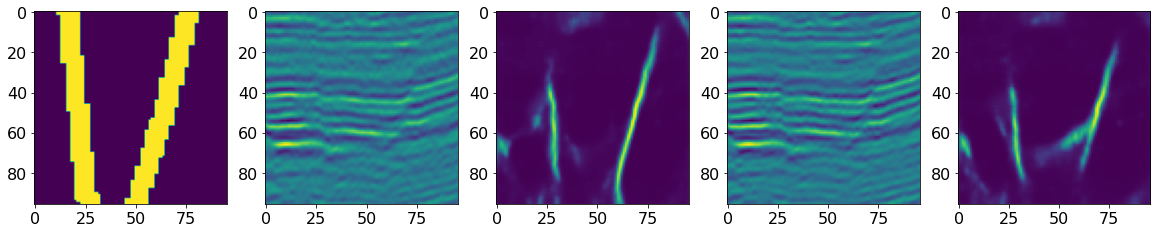

In [29]:
i = 0
fault = np.load("{}/{}.npy".format(fault_path,i))
img_ori = np.load("{}/{}.npy".format(seis_path,i))
pred_ori = np.load("{}/{}.npy".format(prediction_path_thebe,i))
img_denoise_our = np.load('{}/{}.npy'.format(seis_path_denoised,i))
pred_our = np.load("{}/{}.npy".format(prediction_path_thebe_denoised,i))

plt.figure(figsize=(20, 40))
plt.subplot(151)
plt.imshow(fault)
plt.subplot(152)
plt.imshow(img_ori)
plt.subplot(153)
plt.imshow(pred_ori)
plt.subplot(154)
plt.imshow(img_denoise_our)
plt.subplot(155)
plt.imshow(pred_our)

[68, 36, 56]


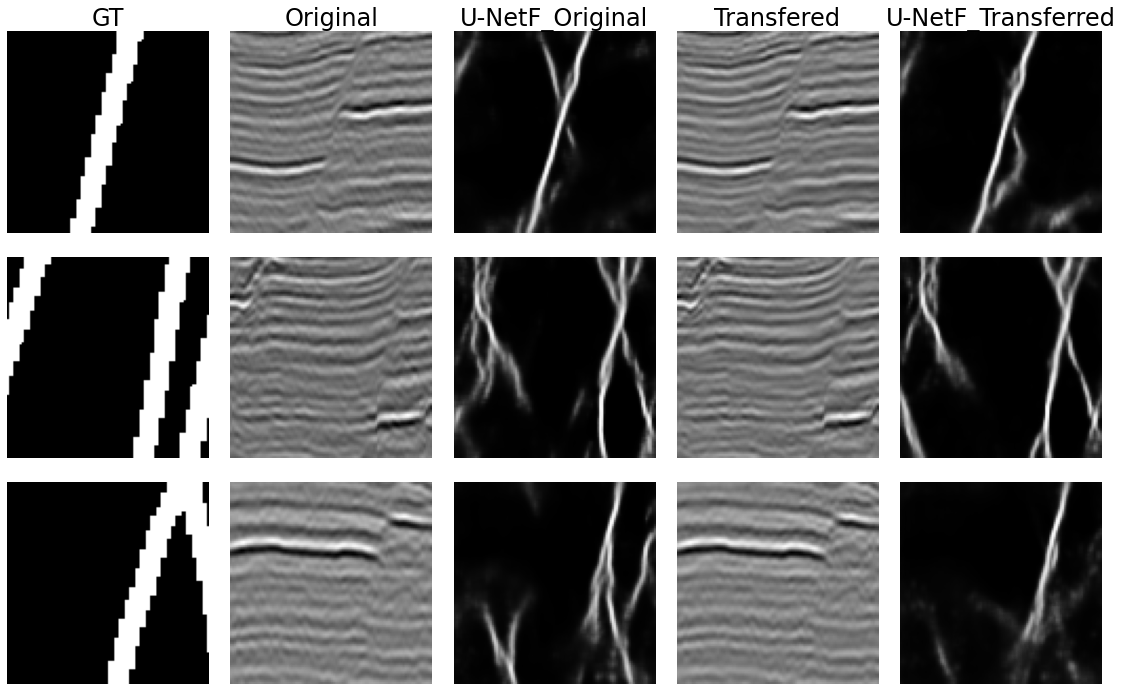

In [10]:
seed = 2022
random.seed(seed)

cols= 3
sampleNo = random.sample(range(0, 100), cols)
print(sampleNo)
rows = 5

f, axarr = plt.subplots(cols, rows, figsize = (20,12))
[axi.set_axis_off() for axi in axarr.ravel()]
plt.subplots_adjust(wspace =0, hspace =0.12)
plt.rcParams.update({'font.size': 20})

axarr[0, 0].set_title('GT')
axarr[0, 1].set_title('Original')
axarr[0, 2].set_title('U-NetF_Original')
# axarr[0, 3].set_title('Ours')
axarr[0, 3].set_title('Transfered')
axarr[0, 4].set_title('U-NetF_Transferred')
    
for ith in range(cols):
    i = sampleNo[ith]
    fault = np.load("{}/{}.npy".format(fault_path,i))
    img_ori = np.load("{}/{}.npy".format(seis_path,i))
    pred_ori = np.load("{}/{}.npy".format(prediction_path_thebe,i))
    img_denoise_our = np.load('{}/{}.npy'.format(seis_path_denoised,i))
    pred_our = np.load("{}/{}.npy".format(prediction_path_thebe_denoised,i))
    
    axarr[ith, 0].imshow(fault, cmap='gray')
    axarr[ith, 1].imshow(img_ori, cmap='gray')
    axarr[ith, 2].imshow(pred_ori, cmap='gray')
    axarr[ith, 3].imshow(img_denoise_our, cmap='gray')
    axarr[ith, 4].imshow(pred_our, cmap='gray')

plt.savefig("fault_transfer{}.pdf".format(seed), bbox_inches='tight')

In [31]:
print(prediction_path_thebe_denoised)
print(prediction_path_thebe)

./thebe100testset96_10per/predictions96/faultsegunet_our0406_thebe_faultseg_96_96_96_8000
./thebe100testset96_10per/predictions96/faultsegunet_thebeori


In [33]:
import math
from sklearn.metrics import average_precision_score
import warnings
warnings.filterwarnings("ignore")
count = 0
print(prediction_path_thebe_denoised)
print(prediction_path_thebe)
print("no\tFaultsegori\tFaultseg_Our_{}_{}".format(dncnnmodelName,iterationNo))
for i in range(100):
    fault = np.load("{}/{}.npy".format(fault_path,i))
    fault = TF.to_tensor(fault)
    pred = np.load("{}/{}.npy".format(prediction_path_thebe,i))
    pred_denoised = np.load("{}/{}.npy".format(prediction_path_thebe_denoised,i))
    ap1 = average_precision_score(fault.flatten(), pred.flatten())
    ap2 = average_precision_score(fault.flatten(), pred_denoised.flatten())
    if math.isnan(ap1) or  math.isnan(ap2):
        count += 1
    else:
        print(i, "\t", ap1, "\t", ap2)
#     break
print(count)


./thebe100testset96_10per/predictions96/faultsegunet_our0406_thebe_faultseg_96_96_96_8000
./thebe100testset96_10per/predictions96/faultsegunet_thebeori
no	Faultsegori	Faultseg_Our_0406_thebe_faultseg_96_96_96_8000
0 	 0.3567109947561163 	 0.35991490966991607
1 	 0.2966111093802881 	 0.3325726569005967
2 	 0.38757095030571054 	 0.3990215933278439
3 	 0.1747917462122281 	 0.18239241400403416
4 	 0.5693398891520252 	 0.6000519228178339
5 	 0.5664396562926107 	 0.5713768182185341
6 	 0.3525856230091417 	 0.3755937124409833
7 	 0.11626477805034002 	 0.11755491328520355
8 	 0.30864627723181176 	 0.3503073358984947
9 	 0.308881992386742 	 0.2615234791740085
10 	 0.21691901539760852 	 0.25619304218028527
11 	 0.12836883330126456 	 0.15198016307611587
12 	 0.4544573484554848 	 0.6486427096156133
13 	 0.651213851085205 	 0.5450954288225803
14 	 0.489142737648946 	 0.4995316242238803
15 	 0.33977096572127274 	 0.4696159945585679
16 	 0.6558094269577642 	 0.6478092973180032
17 	 0.1429077987767731

# frequency

In [11]:
base_dir = './thebe100testset96_10per'
seis_path = '{}/thebeori'.format(base_dir)
dncnnmodelName = "0406_thebe_synthetic_96_96_96"
iterationNo = "8000"
thebe_denoised1 = '{}/our{}_{}'.format(base_dir,dncnnmodelName,iterationNo)
dncnnmodelName = "0406_thebe_faultseg_96_96_96"
iterationNo = "8000"
thebe_denoised2 = '{}/our{}_{}'.format(base_dir,dncnnmodelName,iterationNo)
print(thebe_denoised1)
print(thebe_denoised2)

./thebe100testset96_10per/our0406_thebe_synthetic_96_96_96_8000
./thebe100testset96_10per/our0406_thebe_faultseg_96_96_96_8000


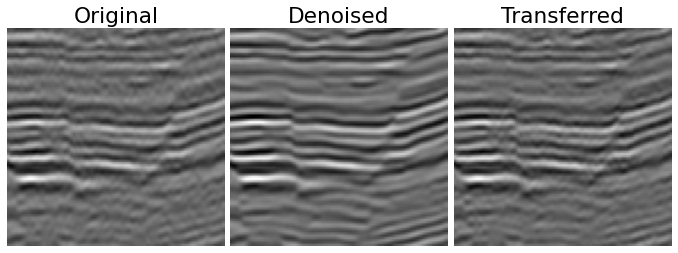

In [12]:
f, axarr = plt.subplots(1, 3, figsize = (12,4))
[axi.set_axis_off() for axi in axarr.ravel()]
plt.subplots_adjust(wspace =0, hspace =0.12)
plt.rcParams.update({'font.size': 18})

axarr[0].set_title('Original')
axarr[1].set_title('Denoised')
axarr[2].set_title('Transferred')
    
i = 0
img = np.load("{}/{}.npy".format(seis_path,i))
img_denoise1 = np.load('{}/{}.npy'.format(thebe_denoised1,i))
img_denoise2 = np.load('{}/{}.npy'.format(thebe_denoised2,i))

axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(img_denoise1, cmap='gray')
axarr[2].imshow(img_denoise2, cmap='gray')

plt.savefig("fault_frequency1.pdf", bbox_inches='tight')

In [14]:
def normalize(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img)) 
fft_pow_0 = np.zeros((96))
fft_pow_1 = np.zeros((96))
fft_pow_2 = np.zeros((96))
for i in range(96):
    fft_1d = np.fft.fft(normalize(img)[:,i])
    fft_1d_1 = np.fft.fft(normalize(img_denoise1)[:,i])
    fft_1d_2 = np.fft.fft(normalize(img_denoise2)[:,i])
    fft_pow_0 = fft_pow_0 + np.abs(fft_1d)
    fft_pow_1 = fft_pow_1 + np.abs(fft_1d_1)
    fft_pow_2 = fft_pow_2 + np.abs(fft_1d_2)

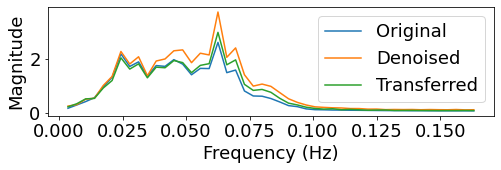

In [15]:
fft_freq = np.fft.fftfreq(96, 3)
# plt.title('Frequecy domain comprison')
plt.figure(figsize=(8,2))
plt.plot(fft_freq[fft_freq > 0], fft_pow_0[fft_freq > 0]/96, label="Original")
plt.plot(fft_freq[fft_freq > 0], fft_pow_1[fft_freq > 0]/96, label="Denoised")
plt.plot(fft_freq[fft_freq > 0], fft_pow_2[fft_freq > 0]/96, label="Transferred")
# plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.savefig("fault_frequency2.png", bbox_inches='tight')